<a href="https://colab.research.google.com/github/ferreiraluisa/faculdade/blob/main/luisa102026lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ferramentas para Minimizar Circuitos em Python

Neste laboratório iremos usar Python e alguns sites para minimizar circuitos com Mapa de Karnaugh.

# Mapa de Karnaugh

Recomendamos os slides
* [Introdução aos Mapas](https://docs.google.com/presentation/d/e/2PACX-1vQZybnIntBeK-znAVhrvO4cm2Zfg8UbY5ZFBiC0lIC4942eoqi7PTeQrAOb3HFU6vIld5Iv88YIWbOi/pub?start=false&loop=false&delayms=3000)

Apostilas
* [Circuitos Combinacionais - Prof. Guntzel](http://www.inf.ufsc.br/~j.guntzel/isd/isd3.pdf)


## Ferramentas Online

* [Visualizar o mapa e as equações](https://www.mathematik.uni-marburg.de/~thormae/lectures/ti1/code/karnaughmap/)

* [Entrar com os mintermos, visualizar mapa, equações em Verilog](https://www.charlie-coleman.com/experiments/kmap/)

# Pacote em Python
Nesta seção iremos configurar o ambiente e fazer alguns testes para ilustrar como especificar as funções.


* Configurar o ambiente
* Testar
* [Artigo com exemplos](https://conference.scipy.org/proceedings/scipy2015/pdfs/chris_drake.pdf)

In [ ]:
# Configurando o Ambiente
!pip3 install pyeda

In [ ]:
from pyeda.inter import *
# Declarando três variáveis
a, b, c = map(exprvar, 'abc')
# especificando uma função f1
f1 = ~a & ~b & ~c | ~a & ~b & c | a & ~b & c | a & b & c | a & b & ~c
# Executando o espresso para minimizar f1
f1m, = espresso_exprs(f1.to_dnf())
f1m


Or(And(~b, c), And(~a, ~b), And(a, b))

In [ ]:
# verificando se f1 = f1m
f1.equivalent(f1m)

True

In [ ]:
f1

Or(Or(Or(Or(And(And(~a, ~b), ~c), And(And(~a, ~b), c)), And(And(a, ~b), c)), And(And(a, b), c)), And(And(a, b), ~c))

## Especificando a tabela verdade

É possível digitar a tabela verdade como se fosse um vetor de bits.

In [ ]:
# espaco de 4 variaveis
X = ttvars('x', 4)
# define f1 produtos 5,6,7,8,9,10 , do 11 ao 15 são dont care "-"
f1 = truthtable(X, "0000011111------")
f2 = truthtable(X, "0001111100------")
f1m, f2m = espresso_tts(f1, f2)
f1m

Or(x[3], And(x[0], x[2]), And(x[1], x[2]))

In [ ]:
# Imprimindo tabela verdade
expr2truthtable(f1m)

x[3] x[2] x[1] x[0]
   0    0    0    0 : 0
   0    0    0    1 : 0
   0    0    1    0 : 0
   0    0    1    1 : 0
   0    1    0    0 : 0
   0    1    0    1 : 1
   0    1    1    0 : 1
   0    1    1    1 : 1
   1    0    0    0 : 1
   1    0    0    1 : 1
   1    0    1    0 : 1
   1    0    1    1 : 1
   1    1    0    0 : 1
   1    1    0    1 : 1
   1    1    1    0 : 1
   1    1    1    1 : 1

### Somador Completo Tabela Verdade

Vamos especificar e fazer a minimizacao.

In [ ]:

X = ttvars('x', 3)
# sum = 001,010,100,111 = 1,2,4,7 e carry = 011,101,110,111 = 3,5,6,7
sum = truthtable(X, "01101001")
carry = truthtable(X, "00010111")
sum_m, carry_m = espresso_tts(sum, carry)

In [ ]:
sum_m

Or(And(~x[0], x[1], ~x[2]), And(x[0], x[1], x[2]), And(x[0], ~x[1], ~x[2]), And(~x[0], ~x[1], x[2]))

In [ ]:
carry_m

Or(And(x[1], x[2]), And(x[0], x[1]), And(x[0], x[2]))

In [ ]:
s = truthtable2expr(sum)
s.simplify()

Or(And(x[0], ~x[1], ~x[2]), And(~x[0], x[1], ~x[2]), And(~x[0], ~x[1], x[2]), And(x[0], x[1], x[2]))

## Exercicio 1

Escreva a tabela verdade do multiplexador
[slide 25](https://docs.google.com/presentation/d/e/2PACX-1vQZybnIntBeK-znAVhrvO4cm2Zfg8UbY5ZFBiC0lIC4942eoqi7PTeQrAOb3HFU6vIld5Iv88YIWbOi/pub?start=false&loop=false&delayms=3000#slide=id.p24)
 e da função x > 8.

In [ ]:
# Complete aqui, o multiplexador e sua minimizacao
X = ttvars('x', 3)
mux = truthtable(X, "01010011")
mux_m =espresso_tts(mux)
mux_m

(Or(And(x[0], ~x[2]), And(x[1], x[2])),)

In [ ]:
# Complete aqui, a função x>8 e sua minimizacao
X = ttvars('x', 4)
maior8 = truthtable(X, "0000000001111111")
maior8_m = espresso_tts(maior8)
maior8_m

(Or(And(x[2], x[3]), And(x[0], x[3]), And(x[1], x[3])),)

In [ ]:
# minimizando de outra forma
g = a | 1
g.simplify()

1

In [ ]:
g = a ^ b ^ c
g.simplify()

Xor(a, b, c)

In [ ]:
g.to_dot()

'graph EXPR { rankdir=BT; n55430112 [label="a",shape=box]; n55430208 [label="b",shape=box]; n55427936 [label=xor,shape=circle]; n55430080 [label="c",shape=box]; n43515040 [label=xor,shape=circle]; n55430112 -- n55427936; n55430208 -- n55427936; n55427936 -- n43515040; n55430080 -- n43515040; }'

## Graphviz 

Voce pode visualizar no [graphviz online](https://dreampuf.github.io/GraphvizOnline/).


In [ ]:
# Instalando o Graphviz
!apt install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


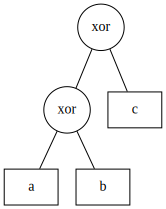

In [ ]:
# Visualizando a funçao g
from graphviz import Source
src = Source(g.to_dot()) # gerando o grafo
src.render('test-output/holy-grenade.gv', view=True) # gerando o arquivo com desenho
Source.from_file('test-output/holy-grenade.gv') # visualizando

## Exercicio 2

Imprimir os desenhos DOT das funcoes mux e maior8

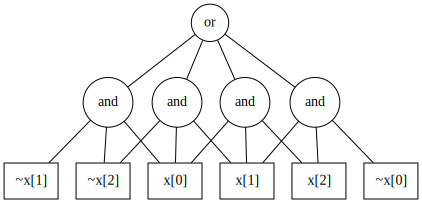

In [ ]:
# mux
g = truthtable2expr(mux) 
from graphviz import Source
src = Source(g.to_dot()) # Completar aqui
src.render('test-output/holy-grenade.gv', view=True) # gerando o arquivo com desenho
Source.from_file('test-output/holy-grenade.gv') # visualizando


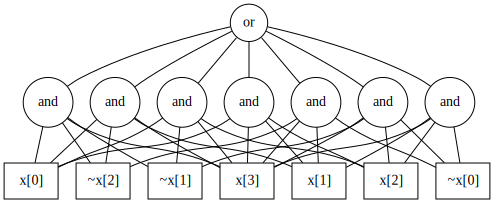

In [ ]:
# maior8
g = truthtable2expr(maior8) 
from graphviz import Source
src = Source(g.to_dot()) # Completar aqui
src.render('test-output/holy-grenade.gv', view=True) # gerando o arquivo com desenho
Source.from_file('test-output/holy-grenade.gv') # visualizando


# Instalar Plugin para Verilog

Executar o comando abaixo.

In [ ]:
!pip install git+git://github.com/canesche/nvcc4jupyter.git
!git clone https://github.com/canesche/nvcc4jupyter
%load_ext nvcc_plugin
#!chmod a+x -R /content/nvcc4jupyter/verilog/

  Cloning git://github.com/canesche/nvcc4jupyter.git to /tmp/pip-req-build-3zdsjn0a
  Running command git clone -q git://github.com/canesche/nvcc4jupyter.git /tmp/pip-req-build-3zdsjn0a
  Created wheel for ColabPlugin: filename=ColabPlugin-0.0.3-cp36-none-any.whl size=9015 sha256=08c6b8611fc7e39c81e96cb6d871577048b3e586821a21eb7cd0e55062834ebc
  Stored in directory: /tmp/pip-ephem-wheel-cache-5az_suqf/wheels/87/ae/09/21c6e192181a0472e20ddd1d5212e2cbb113f00ebe14330d0d
Successfully built ColabPlugin
Cloning into 'nvcc4jupyter'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (195/195), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 195 (delta 67), reused 163 (delta 39), pack-reused 0
Receiving objects: 100% (195/195), 27.64 MiB | 9.56 MiB/s, done.
Resolving deltas: 100% (67/67), done.
created output directory at /content/src
Out bin /content/result.out


In [ ]:
!chmod a+x -R /content/nvcc4jupyter/verilog/

In [ ]:
%%verilog
module test(a, b, m);
input [1:0] a,b; 
output [3:0] m;
assign m[0] = (a[0] & b[0]);  
assign m[1] =  (~a[1] & a[0] & b[1]) | (a[1] & ~a[0] & b[0]) | (a[1] & ~b[1] & b[0]) | (a[0] & b[1] & ~b[0]);
assign m[2] = (a[1] & ~a[0] & b[1]) | (a[1] & b[1] & ~b[0]);
assign m[3] = a[1]&a[0]&b[1]&b[0];
endmodule



module logic_testbench();  // Esta parte do codigo é para gerar os 16 valores
reg [3:0] counter;
wire [3:0] m;

integer k;
	test t(counter[3:2],counter[1:0],m); 
	initial begin
		$display("a1a0 b1b0 |  m");
		$monitor(" %d     %d  |  %d", counter[3:2], counter[1:0], m);
		counter = 0;
		for (k=1; k<16; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule

a1a0 b1b0 |  m
 0     0  |   0
 0     1  |   0
 0     2  |   0
 0     3  |   0
 1     0  |   0
 1     1  |   1
 1     2  |   2
 1     3  |   3
 2     0  |   0
 2     1  |   2
 2     2  |   4
 2     3  |   6
 3     0  |   0
 3     1  |   3
 3     2  |   6
 3     3  |   9



# Exercicio 3
Modificar o exemplo do multiplicador para fazer um somador de 2 bits com números positivos sem sinal e saida S de 3 bits.

Preencher a tabela verdade, usar o mapa de karnaugh para minimizar as expressões. 


* [Visualizar o mapa e as equações](https://www.mathematik.uni-marburg.de/~thormae/lectures/ti1/code/karnaughmap/)

* [Entrar com os mintermos, visualizar mapa, equações em Verilog](https://www.charlie-coleman.com/experiments/kmap/)

In [ ]:
%%verilog
module test(a, b, s);
input [1:0] a,b; 
output [2:0] s;
assign s[0] = (~a[0] & b[0]) | (a[0] & ~b[0]);
assign s[1] = (~a[1] & ~a[0] & b[1]) | (~a[1] & a[0] & ~b[1] & b[0]) | (~a[1] & b[1] & ~b[0]) | (a[1] & ~a[0] & ~b[1]) | (a[1] & ~b[1] & ~b[0]) | (a[1] & a[0] & b[1] & b[0]);
assign s[2] = (a[0] & b[1] & b[0]) | (a[1] & b[1]) | (a[1] & a[0] & b[0]);
endmodule


module logic_testbench();  // Esta parte do codigo é para gerar os 16 valores
reg [3:0] counter;
wire [2:0] s;

integer k;
	test t(counter[3:2],counter[1:0],s); 
	initial begin
		$display("a1a0   b1b0 |  s");
		$monitor(" %d   +   %d   |  %d", counter[3:2], counter[1:0], s);
		counter = 0;
		for (k=1; k<16; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule


a1a0   b1b0 |  s
 0   +   0   |  0
 0   +   1   |  1
 0   +   2   |  2
 0   +   3   |  3
 1   +   0   |  1
 1   +   1   |  2
 1   +   2   |  3
 1   +   3   |  4
 2   +   0   |  2
 2   +   1   |  3
 2   +   2   |  4
 2   +   3   |  5
 3   +   0   |  3
 3   +   1   |  4
 3   +   2   |  5
 3   +   3   |  6



# Exercicio 4
Modificar o exemplo do multiplicador para fazer o comparador de 2 bits com números positivos sem sinal e saidas G,E, L de 3 bits.

Preencher a tabela verdade, usar o mapa de karnaugh para minimizar as expressões. 


* [Visualizar o mapa e as equações](https://www.mathematik.uni-marburg.de/~thormae/lectures/ti1/code/karnaughmap/)

* [Entrar com os mintermos, visualizar mapa, equações em Verilog](https://www.charlie-coleman.com/experiments/kmap/)

In [ ]:
%%verilog
module test(a, b, g,e,l);
input [1:0] a,b; 
output g,e,l;
assign g = (a[0] & ~b[1] & ~b[0]) | (a[1] & ~b[1]) | (a[1] & a[0] & ~b[0]);
assign e = (~a[1] & ~a[0] & ~b[1] & ~b[0]) | (~a[1] & a[0] & ~b[1] & b[0]) | (a[1] & ~a[0] & b[1] & ~b[0]) | (a[1] & a[0] & b[1] & b[0]);
assign l = (~a[1] & ~a[0] & b[0]) | (~a[1] & b[1]) | (~a[0] & b[1] & b[0]);
endmodule



module logic_testbench();  // Esta parte do codigo é para gerar os 16 valores
reg [3:0] counter;
wire g,e,l;

integer k;
	test t(counter[3:2],counter[1:0],g,e,l); 
	initial begin
		$display("a1a0 b1b0 |  gel ");
		$monitor(" %d     %d  |  %d", counter[3:2], counter[1:0], g,e,l);
		counter = 0;
		for (k=1; k<16; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule

a1a0 b1b0 |  gel 
 0     0  |  010
 0     1  |  001
 0     2  |  001
 0     3  |  001
 1     0  |  100
 1     1  |  010
 1     2  |  001
 1     3  |  001
 2     0  |  100
 2     1  |  100
 2     2  |  010
 2     3  |  001
 3     0  |  100
 3     1  |  100
 3     2  |  100
 3     3  |  010

